In [5]:
import numpy as np
import matplotlib.pyplot as plt

import datetime as dt
import matplotlib.dates as mdates
from matplotlib.dates import WeekdayLocator
# import constants for the days of the week
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU
from matplotlib.dates import HourLocator, DayLocator, YearLocator
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

import sys
if "../src" not in sys.path:
    sys.path.append("../src")

from subzero import SubZero
from ipywidgets import interact, IntSlider, FloatSlider

SMALL_SIZE = 25
MEDIUM_SIZE = 40
BIGGER_SIZE = 44

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

%matplotlib inline

In [6]:
subzero = SubZero("../examples/gews_LK", output=False)

subzero.calculate()
# jetzt stehen Temperaturen in subzero.T und interne Wärmeflüsse in subzero.Q_int
# subzero.T[n]: Temperaturen aller Boxen zum Zeitschritt n
# subzero.T[:, n]: Temperaturzeitreihe von Box n
# subzero.Q_int[:, 0, 1], Wärmeflusszeitreihe, zwischen Box 0 (Speicher) und Box 1 (Speicherumgebung)

# subzero.H: Wärme in Boxen (Matrix, wie Temperatur) 
# subzero.Q_ext: Speicherleistung (Zeitreihe, array)
# subzero.v: Geschwindigkeit im Wärmetauscher (Zeitreihe, array)
# subzero.T_in, T_out: Temperaturen an Wärmetauscher (Zeitreihen, arrays)
# subzero.heat_exchanger_flag (Zeitreihe, array)

# subzero.latent_heat_capacity (Zeitreihe, array) (Multipliziert mit dT/dt * V: Rate [W])

read file  input.txt  -  1889  lines


In [7]:

time_array = np.arange(subzero.time.N_t+1) * subzero.time.delta_t # Sekunden

date_start = dt.datetime(2023, # year 
                         8, #month
                         1, # day
                         12, # hour
                         0, # min
                         0  # sec
                        )

x = [date_start + dt.timedelta(seconds=int(time)) for time in time_array] # x-achse
#loc_major = WeekdayLocator(byweekday=(MO)) # für major Grid, ausgewhälter Wochentag
#loc_minor = AutoMinorLocator(7) # für minot Grid, einzelne Tage
date_format = mdates.DateFormatter('%d.%m.')
labelrotation=90 # grad, für x-label (Datum)

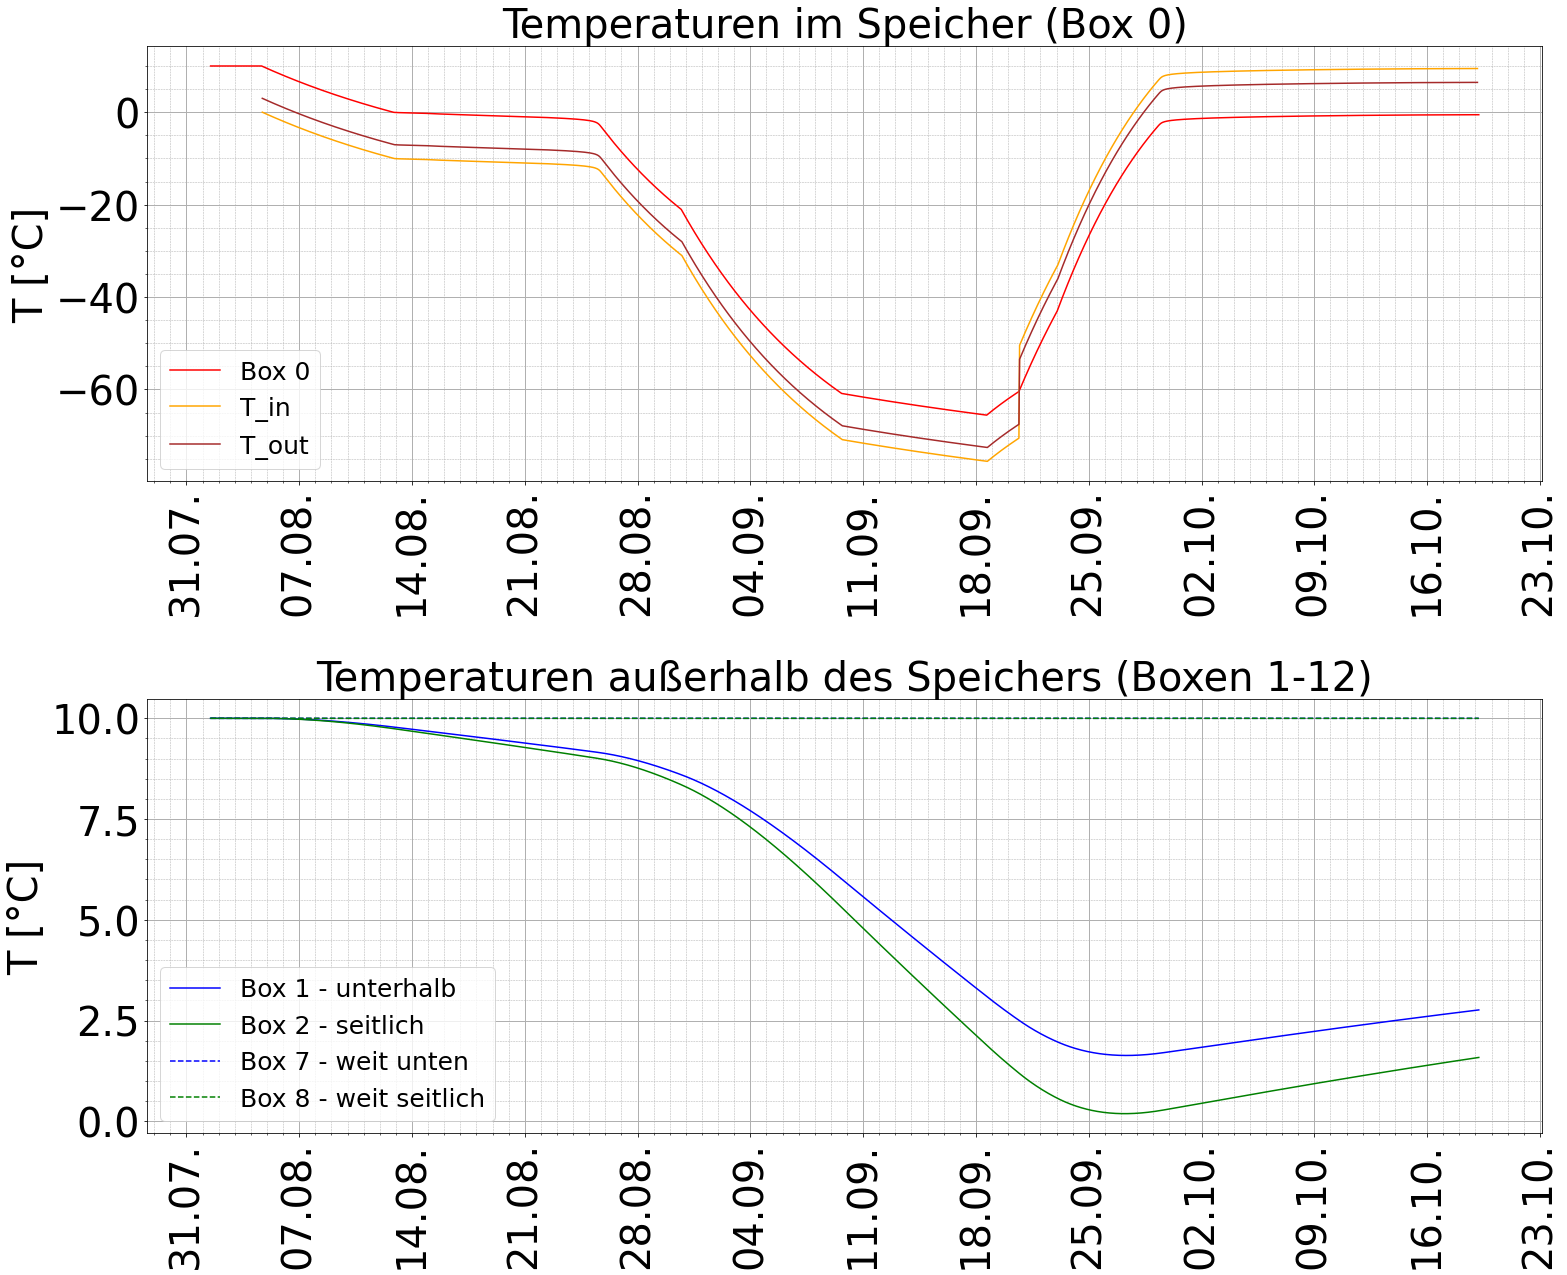

In [8]:

fig, axes = plt.subplots(2, 1, figsize=(25, 20))
plt.subplots_adjust(wspace=.3, hspace=.5)


ax = axes[0]
ax.set_title("Temperaturen im Speicher (Box 0)")
ax.plot(x , subzero.T[:, 0], label='Box 0', color='red')#, marker='x')
ax.plot(x[1:] , subzero.T_in[1:], label='T_in', color='orange')
ax.plot(x[1:] , subzero.T_out[1:], label='T_out', color='brown')


ax.set_ylabel("T [°C]")

ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_major_locator(WeekdayLocator(byweekday=(MO)))#  mdates.DayLocator(interval=1))
ax.tick_params(axis='x', labelrotation=labelrotation)
ax.minorticks_on()
ax.xaxis.set_minor_locator(AutoMinorLocator(7))
ax.grid(visible=True, which='major', linestyle='-',linewidth=1.)
ax.grid(visible=True, which='minor', linestyle='--',linewidth=.5)
#ax.set_xticklabels([])
ax.legend()#loc='lower right')

#####################

ax = axes[1]
ax.set_title("Temperaturen außerhalb des Speichers (Boxen 1-12)")
ax.plot(x , subzero.T[:, 1], label='Box 1 - unterhalb', color='blue')
ax.plot(x , subzero.T[:, 2], label='Box 2 - seitlich', color='green')
ax.plot(x, subzero.T[:, 7], label='Box 7 - weit unten', color='blue', linestyle='--')
ax.plot(x , subzero.T[:, 8], label='Box 8 - weit seitlich', color='green', linestyle='--')


ax.set_ylabel("T [°C]")
ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_major_locator(WeekdayLocator(byweekday=(MO)))#  mdates.DayLocator(interval=1))
ax.tick_params(axis='x', labelrotation=labelrotation)
ax.minorticks_on()
ax.xaxis.set_minor_locator(AutoMinorLocator(7))
ax.grid(visible=True, which='major', linestyle='-',linewidth=1.)
ax.grid(visible=True, which='minor', linestyle='--',linewidth=.5)

ax.legend()#loc='lower right')

plt.savefig("ergebnisse_1.png")

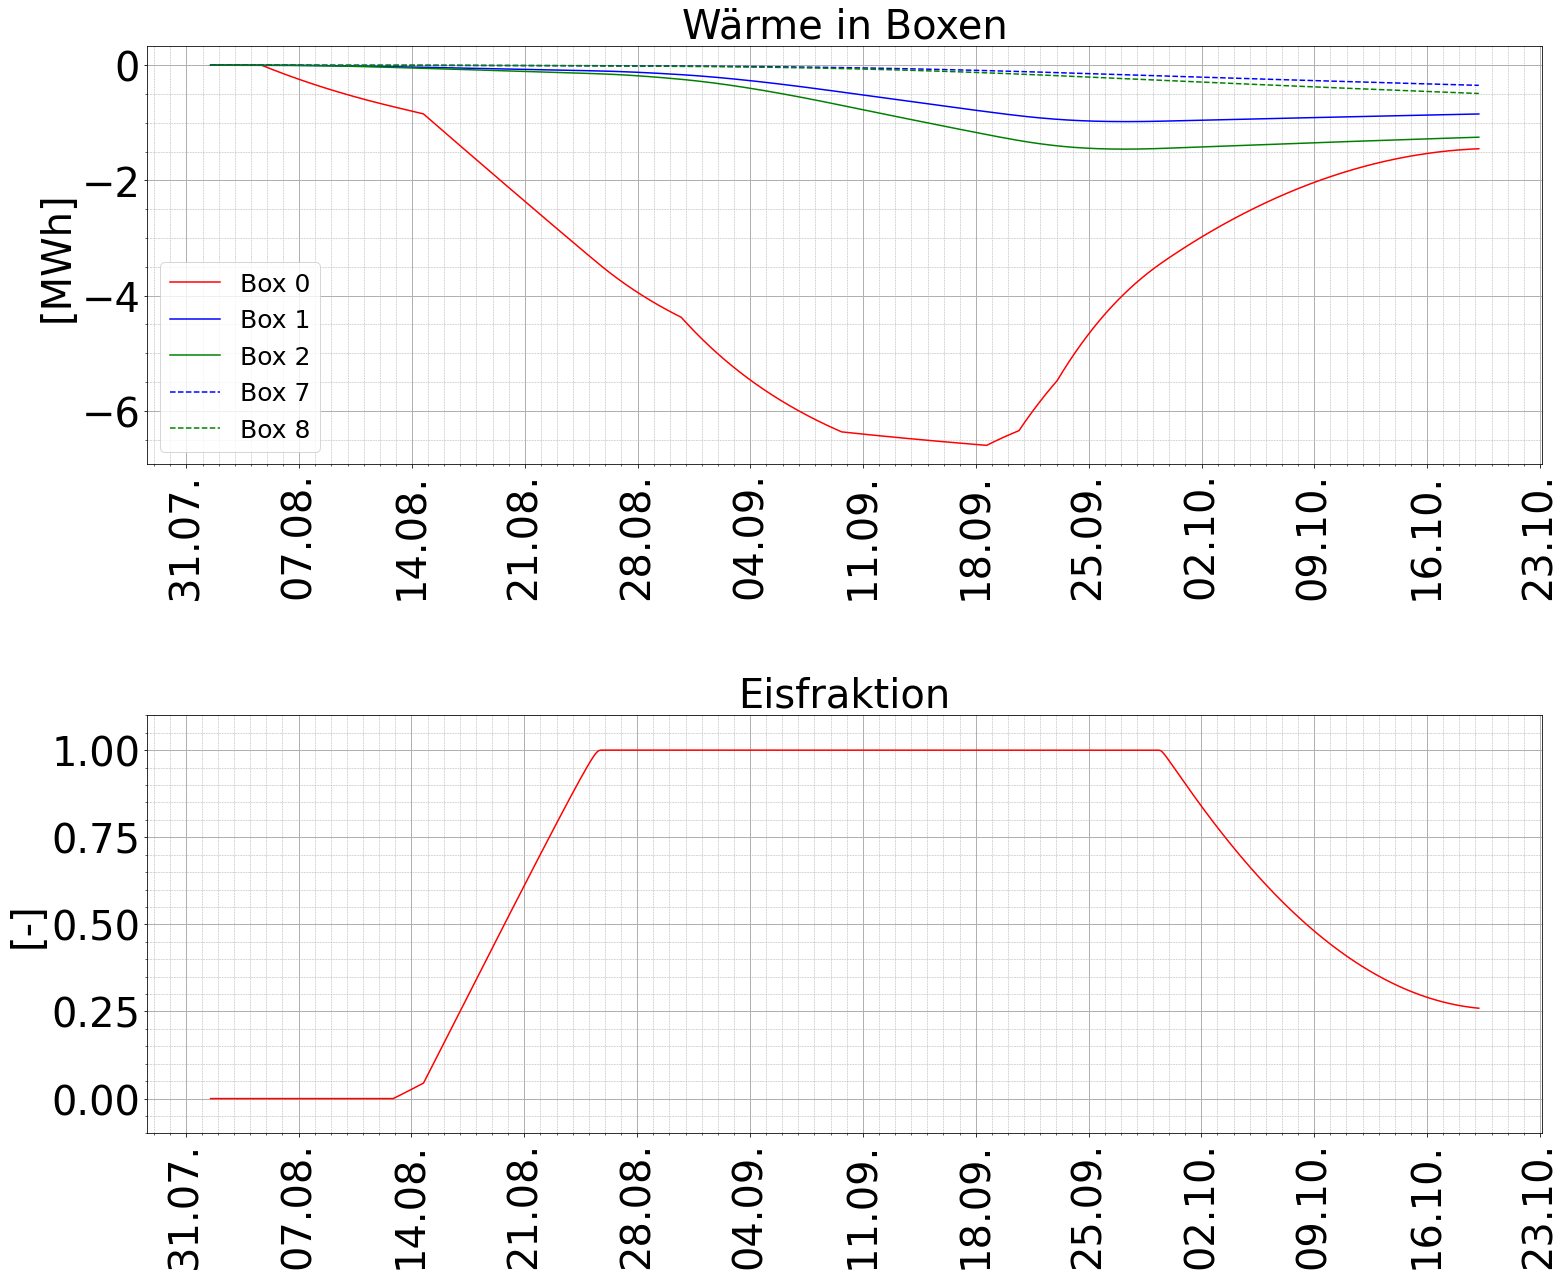

In [9]:

fig, axes = plt.subplots(2, 1, figsize=(25, 20))
plt.subplots_adjust(wspace=.3, hspace=.6)


#########################
storage_factor = 1e6*3600
ax = axes[0]
ax.set_title("Wärme in Boxen")
ax.plot(x, subzero.H[:, 0]/storage_factor, label='Box 0', color='red')
ax.plot(x, subzero.H[:, 1]/storage_factor, label='Box 1', color='blue')
ax.plot(x, subzero.H[:, 2]/storage_factor, label='Box 2', color='green')
ax.plot(x, subzero.H[:, 7]/storage_factor, label='Box 7', color='blue', linestyle='--')
ax.plot(x, subzero.H[:, 8]/storage_factor, label='Box 8', color='green', linestyle='--')


ax.set_ylabel("[MWh]")
ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_major_locator(WeekdayLocator(byweekday=(MO)))#  mdates.DayLocator(interval=1))
ax.tick_params(axis='x', labelrotation=labelrotation)
ax.minorticks_on()
ax.xaxis.set_minor_locator(AutoMinorLocator(7))
ax.grid(visible=True, which='major', linestyle='-',linewidth=1.)
ax.grid(visible=True, which='minor', linestyle='--',linewidth=.5)

ax.legend()#loc='lower right')

#########################
ax = axes[1]
ax.set_title("Eisfraktion")
ax.plot(x[1:], 1-subzero.theta[1:], color='red')


ax.set_ylabel("[-]")
ax.set_ylim([-0.1, 1.1])
ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_major_locator(WeekdayLocator(byweekday=(MO)))#  mdates.DayLocator(interval=1))
ax.tick_params(axis='x', labelrotation=labelrotation)
ax.minorticks_on()
ax.xaxis.set_minor_locator(AutoMinorLocator(7))
ax.grid(visible=True, which='major', linestyle='-',linewidth=1.)
ax.grid(visible=True, which='minor', linestyle='--',linewidth=.5)


plt.savefig("ergebnisse_2.png")

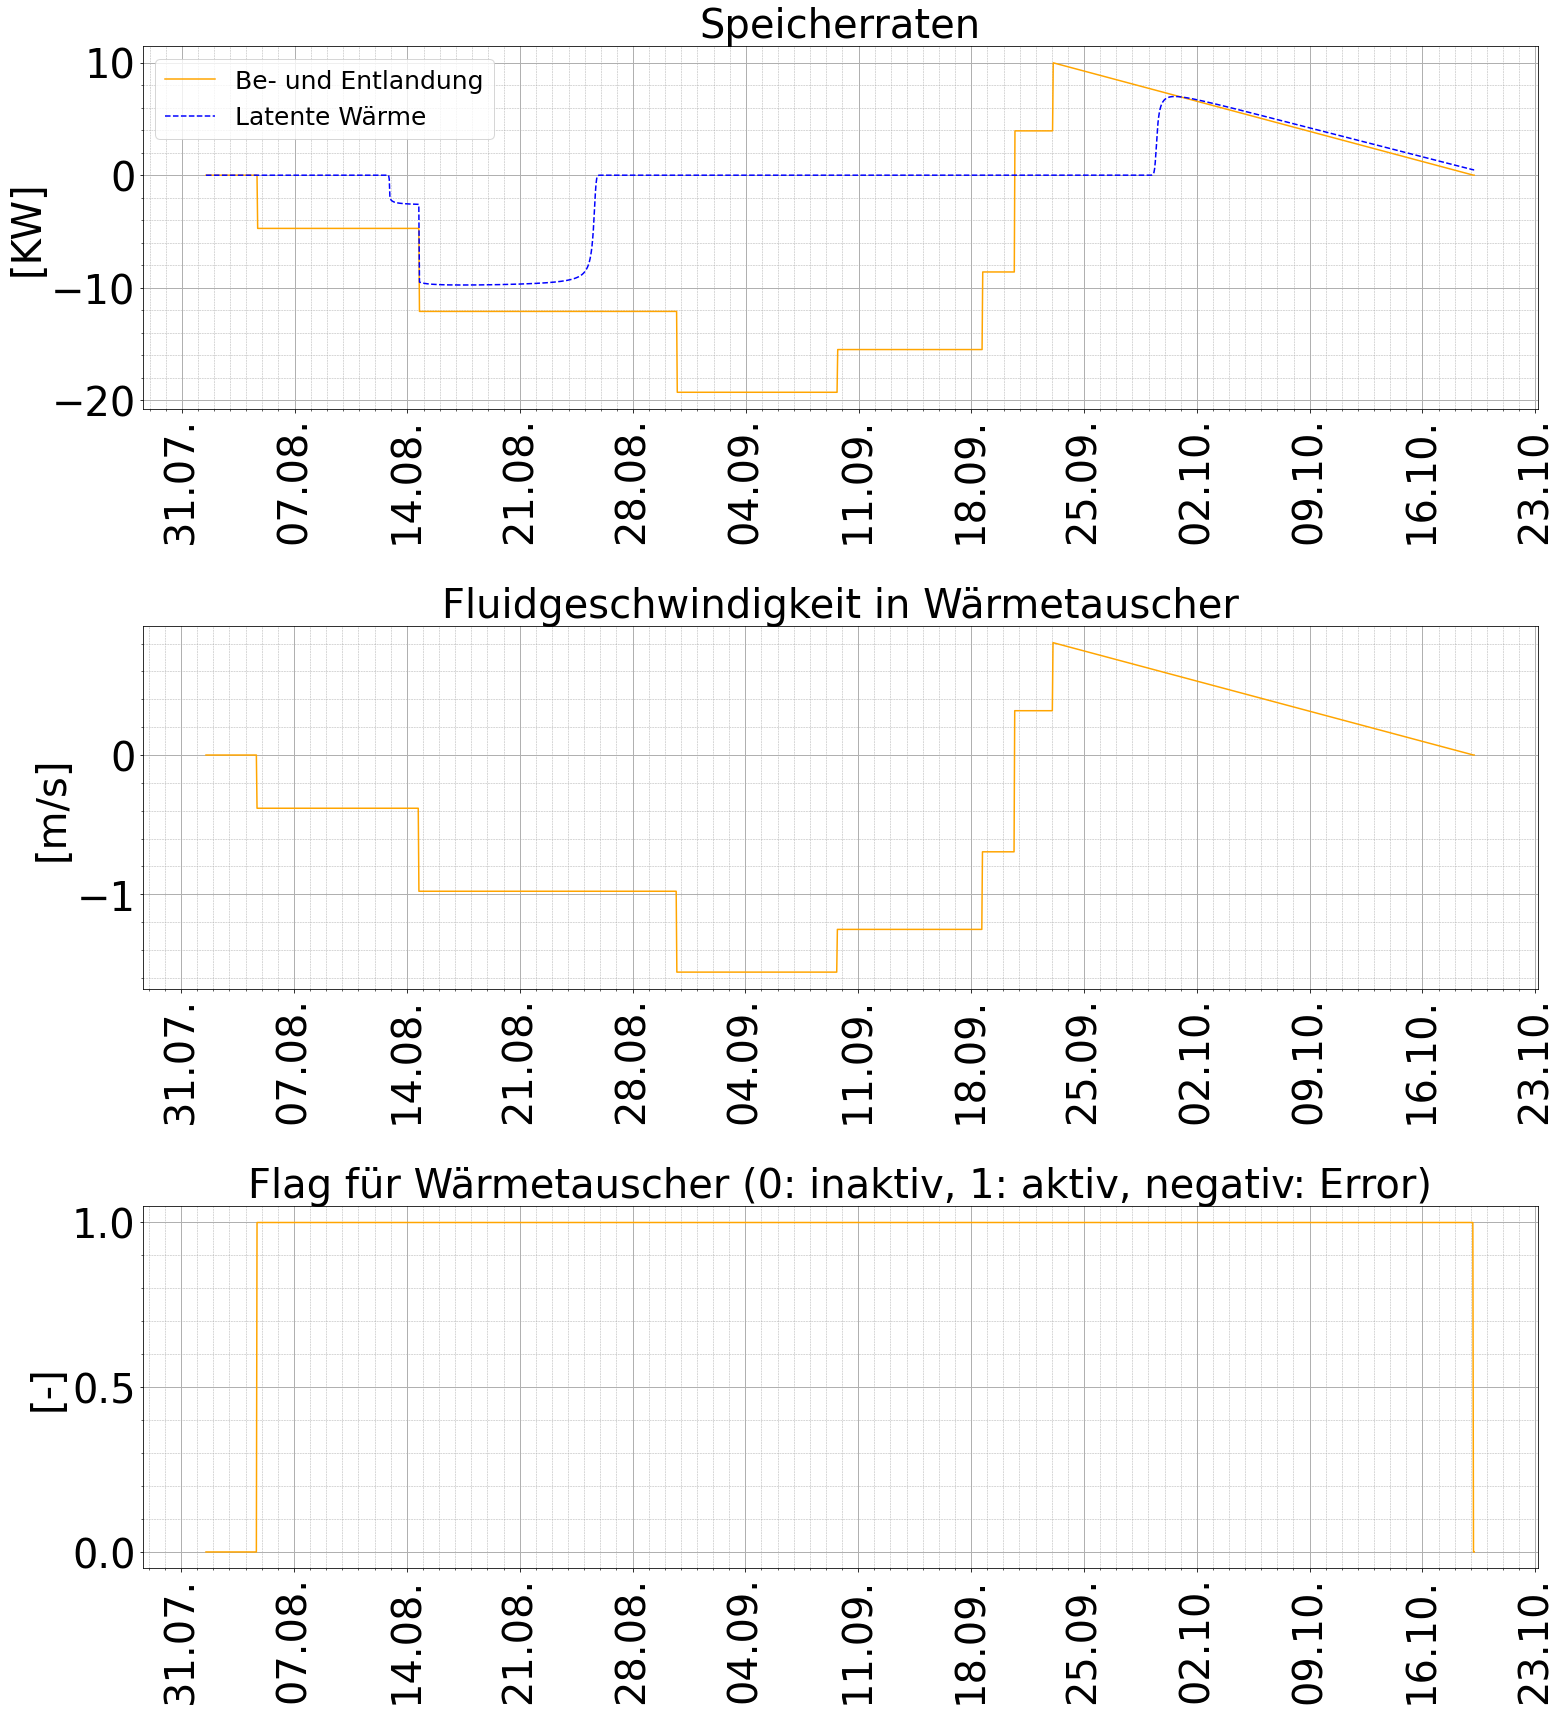

In [10]:
fig, axes = plt.subplots(3, 1, figsize=(25, 28))
plt.subplots_adjust(wspace=.3, hspace=.6)

#########################
storage_factor = 1e3
V_box0 = 4*4*6 # m3
ax = axes[0]
ax.set_title("Speicherraten")
ax.plot(x, subzero.Q_ext/storage_factor, 
        label='Be- und Entlandung', color='orange')
ax.plot(x, 
        -subzero.latent_heat_capacity*V_box0*
        (subzero.T[:, 0]-np.roll(subzero.T[:, 0],1))/3600/storage_factor, 
        label='Latente Wärme', color='blue', linestyle='--')


ax.set_ylabel("[KW]")
ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_major_locator(WeekdayLocator(byweekday=(MO)))#  mdates.DayLocator(interval=1))
ax.tick_params(axis='x', labelrotation=labelrotation)
ax.minorticks_on()
ax.xaxis.set_minor_locator(AutoMinorLocator(7))
ax.grid(visible=True, which='major', linestyle='-',linewidth=1.)
ax.grid(visible=True, which='minor', linestyle='--',linewidth=.5)
ax.legend()#loc='lower right')

#########################

ax = axes[1]
ax.set_title("Fluidgeschwindigkeit in Wärmetauscher")
ax.plot(x[1:], subzero.v[1:], label='v', color='orange')


ax.set_ylabel("[m/s]")
ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_major_locator(WeekdayLocator(byweekday=(MO)))#  mdates.DayLocator(interval=1))
ax.tick_params(axis='x', labelrotation=labelrotation)
ax.minorticks_on()
ax.xaxis.set_minor_locator(AutoMinorLocator(7))
ax.grid(visible=True, which='major', linestyle='-',linewidth=1.)
ax.grid(visible=True, which='minor', linestyle='--',linewidth=.5)
#ax.legend()#loc='lower right')

#########################

ax = axes[2]
ax.set_title("Flag für Wärmetauscher (0: inaktiv, 1: aktiv, negativ: Error)")
ax.plot(x[1:], subzero.heat_exchanger_flag[1:], label='flag', color='orange')


ax.set_ylabel("[-]")
ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_major_locator(WeekdayLocator(byweekday=(MO)))#  mdates.DayLocator(interval=1))
ax.tick_params(axis='x', labelrotation=labelrotation)
ax.minorticks_on()
ax.xaxis.set_minor_locator(AutoMinorLocator(7))
ax.grid(visible=True, which='major', linestyle='-',linewidth=1.)
ax.grid(visible=True, which='minor', linestyle='--',linewidth=.5)
#ax.legend()#loc='lower right')

plt.savefig("ergebnisse3.png")